<a href="https://colab.research.google.com/github/paulors82/Data_Science/blob/main/Churn_Prediction_para_uma_Empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
<img alt="Colaboratory logo" width="100%" src="https://github.com/paulors82/imagens/blob/gh-pages/banner_DS.png?raw=true">

**PAULO ROBERTO DA SILVA**

---

# Churn

Neste projeto vamos abordar um problema de negócio de extrema importância para a continuidade de uma organização:
> ***Churn rate***: *Taxa de Evasão de Clientes*


O **Churn rate** representa a taxa de evasão da sua base de clientes, esta métrica é crucial para alguns segmentos de negócio, principalmente para empresas que oferecem determinados serviços, como TV por assinatura, telefonia e [SaaS](https://pt.wikipedia.org/wiki/Software_como_servi%C3%A7o).

<p align=center>
<img src="https://github.com/paulors82/imagens/blob/gh-pages/churn-rate-blog.png?raw=true" width="70%"></p>


Para o negócio é primordial conhecer sua ***Churn Rate***, visto que altas taxas de cancelamento podem ser resultado de um problema com a *Experiência do Usuário*, o que pode causar um dano na imagem da empresa quando esses usuários externarem seus feedbacks. 

Um outro ponto é o custo para aquisição de um novo cliente (CAC). O **CAC** tende a ser consideravelmente mais custoso que a manutenção de um cliente, mensurar o seu valor é de vital importância para auxiliar em campanhas para redução da **Churn rate**.

Uma campanha de incentivos ao cliente para redução da *Churn Rate* é o caminho normal a ser seguido, mas esses *incentivos* geram custos para o negócio, aplicar essa medida para toda a sua base de clientes pode ser mais prejudicial do que a sua *Churn Rate*.

Nosso projeto visa abordar esse problema elaborando um modelo de **Churn Prediction**.

Com base no histórico dos clientes que cancelaram seus serviços, vamos tentar prever a probabilidade de um cliente cancelar seu serviço futuramente, podendo assim nos antecipar e realizar uma campanha de incentivos, não para toda nossa base de clientes, mas para aqueles com maior probabilidade de cancelamento.

<p align=center>
<img src="https://github.com/paulors82/imagens/blob/gh-pages/ai-robot-frame-technology-abstra.jpg?raw=true" width="70%"></p>

# Churn Prediction

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

###Vamos iniciar nosso projeto importando alguns pacotes necessários, bem como nosso Dataset

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
# importar os dados os dados para um dataframe
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

Com os dados importados para uma estrutura de *Dataframe*, vamos iniciar o processo de Análise Exploratória do nosso conjunto.

##Análise Exploratória

Na análise exlporatória vamos conhecer mais sobre nossa estrutura de dados, analisando seu dimensionamento, balanceamento, valores ausentes, tipos das features, dentre outros.

###Conhecendo o Dataset

In [3]:
# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Podemos observar que as features são em sua maioria composta por ***dados categóricos***, será necessário uma transformação nos dados para que não haja incompatibilidade com o modelo de Machine Learning que iremos utilizar. 

Nossa feature alvo será **Churn**, que inidica se um cliente cancelou o serviço ou não.

###Análise dos tipos das Features

In [4]:
#Verificando quais são nossas features e o seu tipo
print('\nTipo das features do Dataset\n')
display(df.dtypes)


Tipo das features do Dataset



customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Conforme verificado anteriormente, temos apenas 3 features com dados númericos: ***'SeniorCitizen', 'tenure' e 'MontlhyCharges'***. O que é um problema para nosso modelo de Machine Learning.

###Dimensionamento do Conjunto de Dados

In [5]:
print('Features: {}'.format(df.shape[1]))
print('Clientes: {}\n'.format(df.shape[0]))

Features: 21
Clientes: 7043



Temos ***21 features*** e ***7043 registros*** em nosso Dataset

###Valores Ausentes

In [6]:
#Verificando Valores Ausentes

print('Valores Ausentes:\n\n',(df.isnull().sum() / df.shape[0]).sort_values(ascending=False))

Valores Ausentes:

 customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
gender              0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
Churn               0.0
dtype: float64


O Dataset não possui valores ausentes. Vamos verificar o balanceamento dos dados para nossa feature alvo *Churn*, que nos indica quando o cliente cancelou o serviço (Yes), ou se o cliente continua ativo (No).

###Balanceamento dos Dados

Verificando o balanceamento para nossa variável alvo

Churn: 1869 registros

Não Churn: 5174 registros

Taxa de Churn: 26.54%



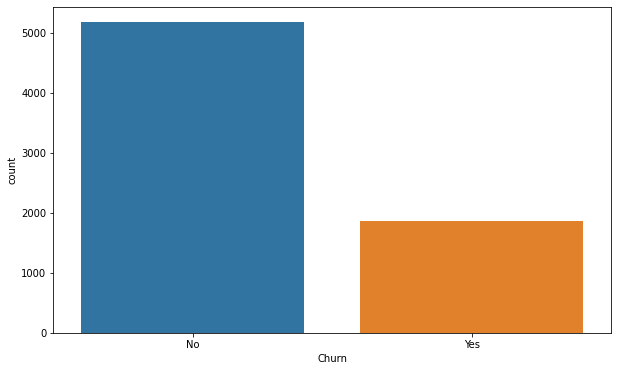

In [7]:
print('Verificando o balanceamento para nossa variável alvo\n')
print('Churn: {} registros\n'.format(df.Churn.value_counts()['Yes']))
print('Não Churn: {} registros\n'.format(df.Churn.value_counts()['No']))
print('Taxa de Churn: {:.4}%\n'.format((df.Churn.value_counts()['Yes']/df.shape[0])*100))

fig, ax = plt.subplots(figsize=(10,6), dpi=72)
sns.countplot(x='Churn', y=None, data=df, ax=ax)
plt.show()

Podemos verificar um leve desbalanceamento para nossa feature alvo, o que pode atrapalhar nosso modelo de Machine Learning. 

Mais adiante veremos se o balanceamento dos dados irá nos oferecer algum benefício.

###Outliers

Agora vamos verificar a presença de outliers para nossas features numéricas.

>***Outlier:*** valor aberrante ou valor atípico, é uma observação que apresenta um grande afastamento das demais da série, ou que é inconsistente. A existência de outliers implica, tipicamente, em prejuízos à interpretação dos resultados dos testes estatísticos aplicados às amostras. *(fonte wikipédia)*


Relembrando temos 3 features numéricas em nosso Dataframe *'SeniorCitizen', 'tenure' e 'MontlhyCharges'*. Mas se analisarmos melhor, temos também a feature *'TotalCharges'*, que está como *type object*, mas contém dados numéricos, como podemos ver a seguir:

In [8]:
df['TotalCharges'].head()


0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

Para analisarmos se a feature *'TotalCharges'* possui outlier será necessário transformarmos a mesma para o tipo *float*. 

Vamos adiantar essa parte da Preparação dos Dados para ser possível finalizarmos nossa Análise Exploratória.

In [9]:
#transformando a feature "TotalCharges" do tipo 'object' para 'float'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'].head()


0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

Após a transformação da feature vamos verificar se a mesma possui valores ausentes, pois como específicamos no comando o parâmetro *errors = 'coerce'*, no caso de erro na conversão, o valor vai ser inserido como NaN.

In [10]:
#Verificando valores ausentes TotalCharges

print('Valores Ausentes "TotalCharges":',(df['TotalCharges'].isnull().sum()))

Valores Ausentes "TotalCharges": 11


Temos 11 valores ausentes para a feature *'TotalCharges'*, nosso dataset possui 7043 registros, os registros ausentes representam apenas 0,16% do total, logo podemos excluir esses registros sem perda de informação no dataset.

In [11]:
#Excluindo valores ausentes
df = df.dropna()
print('Valores Ausentes "TotalCharges":',(df['TotalCharges'].isnull().sum()))

Valores Ausentes "TotalCharges": 0


Após a transformação da feature *'TotalCharges'* e exclusão dos valores ausentes, vamos verificar a presença de outliers para nossas features númericas 'tenure', 'MontlhyCharges' e 'TotalCharges', não iremos verificar a feature 'SeniorCitizen', pois a mesma só possui 2 valores 0 e 1, veja abaixo:

In [12]:
#verificando valores únicos para a variável SeniorCitizen
print('Quantidade de valores únicos "SeniorCitizen": ', len(df['SeniorCitizen'].unique()))
print('Valores únicos para SeniorCitizen: ', df['SeniorCitizen'].unique())


Quantidade de valores únicos "SeniorCitizen":  2
Valores únicos para SeniorCitizen:  [0 1]


####Resumo Estatístico

Vamos utiliar o *describe* para verificar o resumo estatístico das features e analisar se identificamos anomalias.



In [13]:
#Verificando o resumo estatístico das variáveis numéricas para verificar presença de outliers
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Podemos observar que não temos grandes discrepâncias nas features, temos valores de desvio padrão aceitáveis, que nos mostra o quanto os dados se dispersam em relação a média.

Temos também uma boa distribuição entre os valores ***min, Quartis (25%, 50%, 75%) e max***, mostrando uma certa discrepância apenas na feature *TotalCharges*, onde 75% dos valores estão abaixo de 3794.73 e o valor máximo é de 8684.80.

Para analisarmos a distribuição dos dados de uma forma visual, vamos plotar 2 gráficos que irão nos permitir entender melhor como os dados estão dispersos, usaremos o **Histograma e o Boxplot**

####Histograma

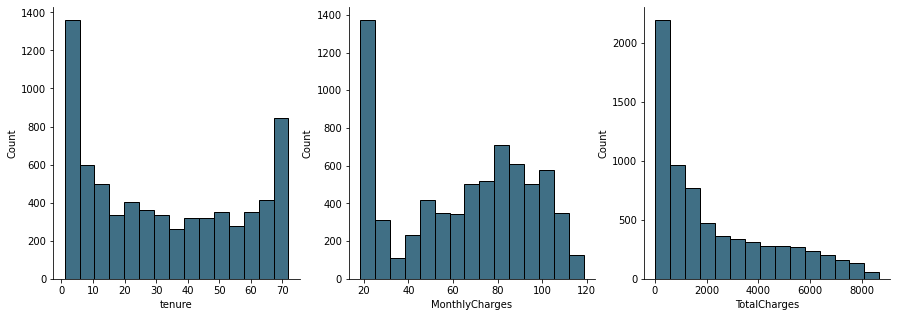

In [14]:
#Histograma para as features numéricas

fig, ax = plt.subplots(figsize=(15,5), dpi=72, ncols=3)

sns.histplot(bins=15, y=None, data=df.tenure, ax=ax[0], color="#003F5c")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

sns.histplot(bins=15, y=None, data=df.MonthlyCharges, ax=ax[1], color="#003F5c")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

sns.histplot(bins=15, y=None, data=df.TotalCharges, ax=ax[2], color="#003F5c" )
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
plt.show()

Conforme já haviamos verificado no Resumo Estatístico, podemos observar no Histograma que temos uma boa distribuição dos dados, apenas na feature *'TotalCharges'* podemos perceber uma distribuição menos uniforme e um range de valores de maior amplitude. 

O ***Boxplot*** irá nos ajudar a entender ainda melhor essa distribuição.

####Boxplot

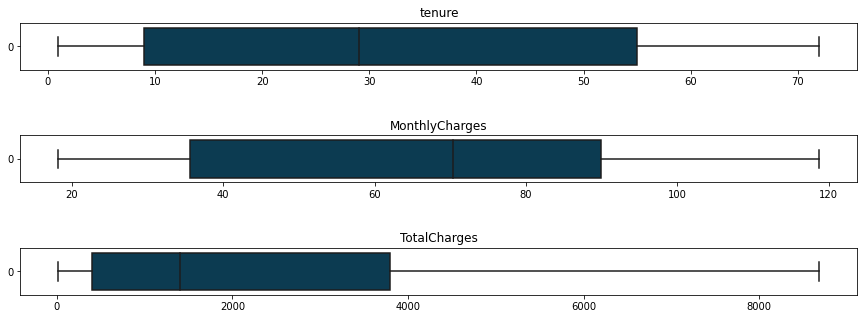

In [15]:
fig, ax = plt.subplots(figsize=(15,5), dpi=72, ncols=1, nrows=5)

sns.boxplot(data=df.tenure, ax=ax[0], orient='h', color="#003F5c")
ax[0].set_title('tenure')
ax[1].set_visible(False)

sns.boxplot(data=df.MonthlyCharges, ax=ax[2], orient='h', color="#003F5c")
ax[2].set_title('MonthlyCharges')
ax[3].set_visible(False)

sns.boxplot(data=df.TotalCharges, ax=ax[4], orient='h', color="#003F5c")
ax[4].set_title('TotalCharges')

plt.show()

Agora podemos confirmar o que já havia sido observado no *Resumo Estatístico e Histograma*, podemos ver como a maior parte dos dados estão distribuídos mais ao centro do range de valores para as features *tenure e MonthlyCharges*.

Para *TotalCharges* verificamos que a concentração dos dados está em sua grande parte entre *0 e 4000*, e o restante se estende a valores acima de *8000*. Esses valores que se estendem muito acima do range onde estão dispostos a maior parte dos dados, podem interferir em nosso modelo de Machine Learning, sendo mais um ponto a tratarmos na fase de Preparação dos Dados.

Para um melhor entendimento sobre o Boxplot verifique [Aqui](https://pt.wikipedia.org/wiki/Diagrama_de_caixa)

Agora que já temos um bom entendimento sobre o nosso conjunto de dados, precisamos prepará-los para o nosso modelo de Machine Learning, corrigindo os pontos que identificamos como prejudiciais a sua performance.

##Preparação dos Dados

Vamos iniciar a fase de preparação dos dados, em nossa análise vimos que nosso conjunto é composto em grande parte por features categóricas, os algoritmos de Machine Learning trabalham em sua maioria com dados numéricos. 

Vamos precisar transformar nossas features categóricas em numéricas, para decidirmos qual forma de transformação usar, precisamos saber a quantidade de valores únicos presentes em cada feature.

In [16]:
#verificando a quantidade de valores únicos das variáveis

print("Quantidades de Valores Únicos para cada Feature do Dataset\n")
for col in df.columns :
  if len(df[col].unique()) < 5 :
    print(col, ': ', len(df[col].unique()), df[col].unique(), '\n')
  else :
    print(col, ': ', len(df[col].unique()), '\n')  

Quantidades de Valores Únicos para cada Feature do Dataset

customerID :  7032 

gender :  2 ['Female' 'Male'] 

SeniorCitizen :  2 [0 1] 

Partner :  2 ['Yes' 'No'] 

Dependents :  2 ['No' 'Yes'] 

tenure :  72 

PhoneService :  2 ['No' 'Yes'] 

MultipleLines :  3 ['No phone service' 'No' 'Yes'] 

InternetService :  3 ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity :  3 ['No' 'Yes' 'No internet service'] 

OnlineBackup :  3 ['Yes' 'No' 'No internet service'] 

DeviceProtection :  3 ['No' 'Yes' 'No internet service'] 

TechSupport :  3 ['No' 'Yes' 'No internet service'] 

StreamingTV :  3 ['No' 'Yes' 'No internet service'] 

StreamingMovies :  3 ['No' 'Yes' 'No internet service'] 

Contract :  3 ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling :  2 ['Yes' 'No'] 

PaymentMethod :  4 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges :  1584 

TotalCharges :  6530 

Churn :  2 ['No' 'Yes'] 



Observamos que nossas features possuem no máximo 4 valores únicos *(com excessão das nossas features numéricas que não precisarão ser transformadas)*. A feature *'customerID'* possui um valor único para cada registro, seu valor não possui informação relevante para o modelo, vamos remover essa feature do dataset posteriormente.

Essa informação dos valores únicos é importante porque um dos métodos de transformação cria uma feature nova no dataset para cada valor único, se a feature possui muitos valores únicos isso irá aumentar consideravemente o tamanho e complexidade do dataset. No nosso caso as features possuem poucos valores únicos então poderemos utilizar o método **One Hot Encoder**.

>**One Hot Encoder** cria uma nova feature para cada valor único, caso aquele registro possua o determinado valor, a feature criada recebe *1*, do contrário recebe *0*. Vamos ilustrar para melhor entendimento.

<p align=center>
<img src="https://github.com/paulors82/imagens/blob/gh-pages/ohe.png?raw=true" width="50%"></p>

*Quem quiser saber mais [Veja Aqui](https://www.kaggle.com/code/dansbecker/using-categorical-data-with-one-hot-encoding/notebook)*





####Remoção feature e Transformação *'Churn'*

Antes da transformação das features vamos realizar 2 ações, excluir a feature *'customerID'* que não acrescenta informação ao nosso conjunto e possui um valor único para cada registro, e transformar a nossa variável alvo manualmente, visto que o ***One Hot Encoder*** iria gerar 2 colunas diferentes para a variável alvo.

In [17]:
#Criando uma cópia do Dataframe e removendo a feature customerID que não acrescenta informações relevantes para o modelo de Machine Learning 
df_clean = df.drop('customerID', axis=1)

#transformar nossa variável alvo de categórica para binária
df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1}, na_action=None)

print('Colunas do Dataframe \n\n',df_clean.columns.tolist())
print('\nValores únicos para Chrun: ', df_clean['Churn'].unique())



Colunas do Dataframe 

 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Valores únicos para Chrun:  [0 1]


Feature *'customerID'* removida e alterada feature *'Churn'* para:

Valor *'No'* inserido *'0'* 

Valor *'Yes'* inserido *'1'*

####One Hot Encoding - Tratando Variáveis Categóricas

Primeiramente vamos pegar a lista de features do nosso dataset, exceto as features numéricas e as que realizamos as transformações manualmente

In [18]:
#colocando em uma lista as features que passarão pelo One-Hot-Encoding, demais features já são numéricas
features = []
for col in df_clean.columns :
  if col != 'Churn' and col != 'TotalCharges' and col != 'MonthlyCharges' and col != 'tenure' and col != 'SeniorCitizen':
    features.append(col)
print(features)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Com o nome das nossas features em formato de lista, vamos agora realizar a transformação através do get_dummies.

In [19]:
#Transformando variáves categóricas com o One-Hot-Encoding
df_enc = pd.get_dummies(df_clean, columns=features)

print('\nNova dimensão do dataset após One-Hot-Encoding\n')
print('Features: {}'.format(df_enc.shape[1]))
print('Clientes: {}\n'.format(df_enc.shape[0]))

display(df_enc.dtypes)


Nova dimensão do dataset após One-Hot-Encoding

Features: 46
Clientes: 7032



SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

Vejam que o número de features do nosso Dataset foi de **20** para **46**, foi criada uma feature nova para cada valor único da nossa lista de features passado como parâmetro. Nosso Dataset mais que dobrou o número de features, por esse motivo em features com muitos valores únicos o ideal é utilizar um método diferente no tratamento das variáveis categóricas.

Podemos observar também que o tipo das features transformadas agora é ***uint8***, significa um inteiro de 8 bits (entre 0 e 255).

Vamos analisar como ficou nosso Dataset

In [20]:
df_enc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


Visualizando o Dataset conseguimos entender exatamente como é realizada a transformação, observando como exemplo a feature *'gender'*, ela foi substituida pelas features *'gender_Female e gender_Male'*, onde recebe *1 ou 0* para Female ou Male.



####Trantando Outliers

Outro ponto observado foi a presença de ***Outliers*** para a variável *'TotalCharges'*, vamos verificar como podemos amenizar o seu impacto.
Vamos ver a possibilidade de eliminar os registros que estejam muito acima da média, mas temos que ter o cuidado de não eliminar um montante considerável dos dados para que não haja perda de informação.



In [21]:
print('Total de registros: {}\n'.format(df_enc.shape[0]))

print('"TotalCharges" valores acima de:\n')
print('Acima de 6000 - {} entradas'.format(len(df_enc[df_enc.TotalCharges > 6000])))
print('{:.2f}% do total de entradas\n\n'.format((len(df_enc[df_enc.TotalCharges > 6000]) / df_enc.shape[0])*100))

print('Acima de 7000 - {} entradas'.format(len(df_enc[df_enc.TotalCharges > 7000])))
print('{:.2f}% do total de entradas\n\n'.format((len(df_enc[df_enc.TotalCharges > 7000]) / df_enc.shape[0])*100))

print('Acima de 8000 - {} entradas'.format(len(df_enc[df_enc.TotalCharges > 8000])))
print('{:.2f}% do total de entradas'.format((len(df_enc[df_enc.TotalCharges > 8000]) / df_enc.shape[0])*100))


Total de registros: 7032

"TotalCharges" valores acima de:

Acima de 6000 - 692 entradas
9.84% do total de entradas


Acima de 7000 - 327 entradas
4.65% do total de entradas


Acima de 8000 - 78 entradas
1.11% do total de entradas


Analisando os valores acima de 6000, 7000 e 8000 e quanto eles representam do nosso Dataset concluimos que:
> Acima de 6000 representa uma parcela significativa do Dataset, se eliminarmos teremos uma perda considerável de informação. Acima de 8000 representa uma parcela muito pequena dos dados, possivelmente não teremos ganho com a eliminação apenas desses dados.

Vamos considerar eliminar os dados acima de 7000, não teremos uma perda de informação significativa e iremos conseguir diminuir nossos ***Outliers***

In [22]:
#diminuindo outliers para ""TotalCharges"
df_enc.drop(df_enc[df_enc.TotalCharges > 7000].index, axis=0, inplace=True)

print('"TotalCharges" valores acima de 7000:')
print('{} entradas'.format(len(df_enc[df_enc.TotalCharges > 7000])))
print('{:.2f}% do total de entradas\n\n'.format((len(df_enc[df_enc.TotalCharges > 7000]) / df_enc.shape[0])*100))

"TotalCharges" valores acima de 7000:
0 entradas
0.00% do total de entradas




Valores removidos vamos visualizar se houve alteração plotando os gráficos *Boxplot* de antes e depois  para a feature *'TotalCharges'*

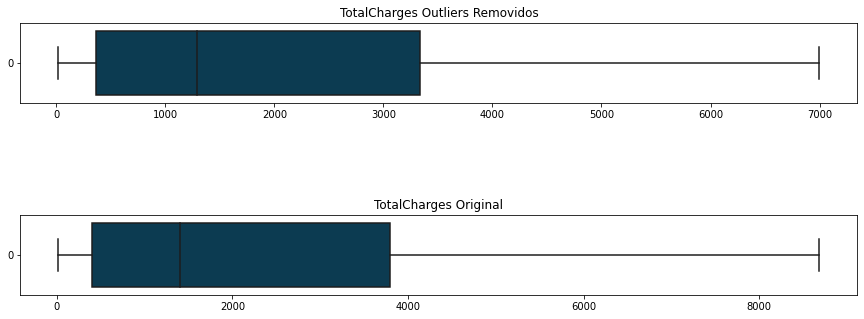

In [23]:
fig, ax = plt.subplots(figsize=(15,5), dpi=72, ncols=1, nrows=3)

sns.boxplot(data=df_enc.TotalCharges, ax=ax[0], orient='h', color="#003F5c")
ax[0].set_title('TotalCharges Outliers Removidos')

ax[1].set_visible(False)

sns.boxplot(data=df_clean.TotalCharges, ax=ax[2], orient='h', color="#003F5c")
ax[2].set_title('TotalCharges Original')

plt.show()

Podemos observar na plotagem dos dois gráficos, que após a remoção dos outliers, o range de valores diminuiu e nosso bloco principal dos dados ocupa uma maior área.

###Dividindo dados entre Treino e Teste

Após a importação das bibliotecas necessárias será realizada a divisão do conjunto de dados entre Treino e Teste através do **train_test_split**. Basicamente é carregado na variável X todo o dataframe, excluindo a coluna de interesse(a ser prevista pelo modelo), no nosso caso *'Churn'*, que contém a indicação de *Chrun (1) ou Não Churn(0)*.

Na variável y é carregada a coluna "resposta" *'Churn'*.

Com isso o train_test_split divide os dados em treino e teste.

In [ ]:
#instalação do scikit-plot no colab 
!pip install scikit-plot

In [25]:
#Importando pacotes necessários
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import scikitplot as skplt
import numpy as np

from imblearn.under_sampling import RandomUnderSampler


In [26]:
#Separar os dados entre treino e teste
X = df_enc.drop('Churn', axis=1)
y = df_enc['Churn']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

Após a divisão dos dados vamos realizar o balanceamento dos dados de *Treino*

###Balanceamento dos Dados

Anteriormente vimos que o balancemanto dos dados para a nossa variável alvo *'Churn'* era de 26,54% do total de registros. O processo de treino de um modelo de Machine Learning pode ser extremamente afetado utilizando dados desbalanceados.

Vamos realizar o balanceamento dos dados através do método ***RandomUnderSampler***, que utiliza a técnica *undersampling*, mantendo todos os dados da classe minoritária(*Churn(1)*) e realizando a diminuição da classe majoritária(*Não Churn(0)*).

O balanceamento deve ser aplicado nos dados de treino, não deve ser aplicado aos dados de Teste / Validação.

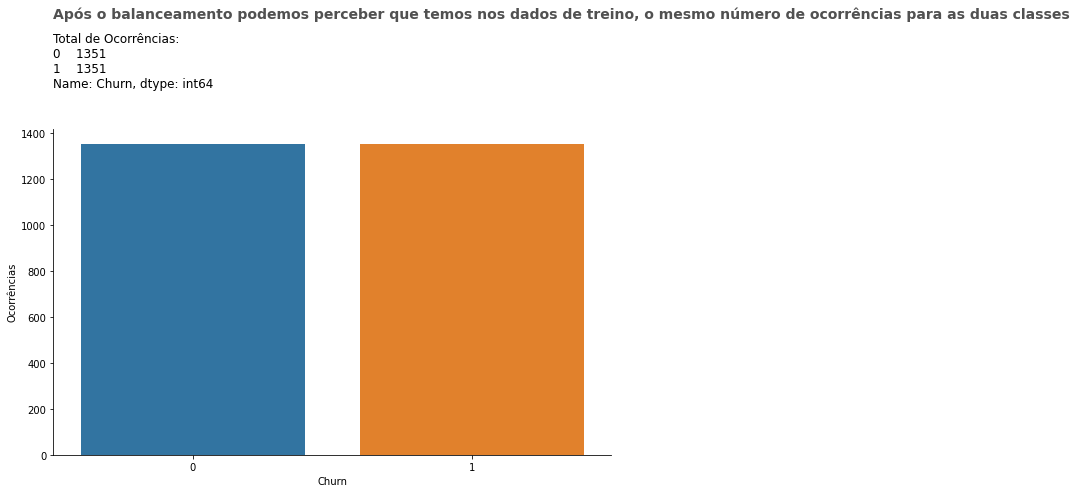

In [27]:
#Balancear conjunto de dados (Técnica de balanceamento under-sampling (diminuir classe majoritária))
rus = RandomUnderSampler()

#Balanceamento dos dados
X_rus, y_rus = rus.fit_resample(X_train, y_train)

fig, ax = plt.subplots(figsize=(10,6), dpi=72)
sns.countplot(x=y_rus, y=None, ax=ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('Ocorrências')

ax.text(-0.5,1900,f'Após o balanceamento podemos perceber que temos nos dados de treino, o mesmo número de ocorrências para as duas classes', fontsize=14, color="#515151", fontweight='semibold')

z = pd.Series(y_rus).value_counts()

ax.text(-0.5, 1600, f'Total de Ocorrências:\n{z}', fontsize=12)

plt.show()


##Modelo de Machine Learning

Chegou a hora de submetermos nossos dados ao Modelo de Machine Learning, para isso seguimos as etapas:
* Instânciar o modelo a ser utilizado
> Vamos utilizar o algoritmo **XGBoost** que vem ganhando espaço e se tornando ums dos mais usados ultimamente, é uma referência em precisão e acurácia. O XGBoost é uma implementação de árvores de decisão impulsionadas por gradiente projetadas para velocidade e desempenho.


* Passar para o modelo os dados de treino, 
> Vamos utilizar a técnica [**Cross Validation**](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada), ela nos permite realizar os ajustes dos hiperparâmetros do nosso modelo nos dados de treino, evitando realizar esses ajustes nos dados de teste, assim conseguimos previnir o [overfitting](https://pt.wikipedia.org/wiki/Sobreajuste) e verificar a capacidade de generalização do modelo. 

* Realizar previsões em cima dos dados de teste para analisarmos o desempenho do modelo

###Treinando o Modelo

Submetendo os dados ao modelo **XGBoost** e realizando o treinamento através do **Cross Validation**

Vamos realizar o treinamento com o conjunto de dados Balanceados e Desbalanceados, assim vamos poder analisar a diferença no resultado do treinamento entre eles.

In [28]:
#Realizando o teste do modelo utilizando Cross-Validation

#Atribuindo seed para manter os resultados (derivados de aleatoridade)
np.random.seed(2)

#Instanciar o modeloe escolher os Hypermarameters
model = XGBClassifier(
    learning_rate=0.05,
    n_estimators=200,
    max_depth=6,
    subsample = 0.9,
    colsample_bytree = 0.1,
    gamma=1,
    random_state=42
    )

# Cross-validation
cv = StratifiedKFold(n_splits = 5, shuffle = True)

scores_desbalanceado = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1" )
scores = cross_val_score(model, X_rus, y_rus, cv=cv, scoring="f1" )

print("\nScores Dados Desbalanceados: {}".format(scores_desbalanceado))
print("Acurácia: %0.2f | Desvio Padrão: +/- %0.2f\n\n" % (scores_desbalanceado.mean(), scores_desbalanceado.std() * 2))

print("Scores Dados Balanceados: {}".format(scores))
print("Acurácia: %0.2f | Desvio Padrão: +/- %0.2f" % (scores.mean(), scores.std() * 2))


Scores Dados Desbalanceados: [0.56475584 0.53846154 0.58024691 0.55142232 0.5814433 ]
Acurácia: 0.56 | Desvio Padrão: +/- 0.03


Scores Dados Balanceados: [0.77697842 0.77210884 0.78354204 0.7943761  0.76869565]
Acurácia: 0.78 | Desvio Padrão: +/- 0.02


Foi instanciado o modelo com alguns dos principais hiperparêmetros e sendo ajustado até chegar ao resultado demonstrado. Foi parametrizado também o **Cross Validation** para realizar o teste em 5 amostras ***n_split*** e pegar essas amostras de forma aleatoria ***shuffle***.


Podemos observar na prática o impacto dos dados desbalanceados para o treinamento do nosso modelo, **saímos de uma Acurácia de 56% para 78%!**

Durante o treino o modelo teve um desvio padrão de +/- 2% entre os 5 testes realizados.

###Avaliar o Desempenho do Modelo

Após submetermos nossos dados de treino e ajustarmos os hiperparâmetros conseguindo bons resultados, chegou a hora de verificarmos sua performance realizando as previsões em cima dos dados de teste.

Para medir o desempenho do nosso modelo utilizaremos ***Classification Report, Matriz de Confusão, Acurácia e a AUC ROC***.

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1192
           1       0.54      0.82      0.65       485

    accuracy                           0.75      1677
   macro avg       0.72      0.77      0.73      1677
weighted avg       0.80      0.75      0.76      1677


 
Acurácia do Modelo: 0.75 

AUC ROC: 0.77



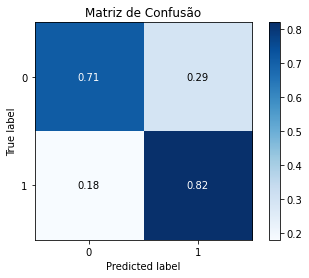

In [29]:
# Fit do modelo
model.fit(X_rus, y_rus)

#5 Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

#verificando resultados
#Classification report
print(classification_report(y_test, y_pred))

#Acurácia
ac = accuracy_score(y_test, y_pred)
print(f'\n \nAcurácia do Modelo: {ac:.2f} \n')

#AUC
print('AUC ROC: {:.2f}\n'.format(roc_auc_score(y_test, y_pred)))

#Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, title='Matriz de Confusão');


 ***Acurácia*** para dados desbalanceados não é uma métrica confiável, visto que sua fórmula é:  
**nº de previsões corretas / total de previsões** 


>  Seguindo o balanceamento do nosso conjunto de dados em que tinhamos ***26,54% Churn e 73,46% Não Churn***, mesmo se o modelo não classificasse nenhum registro como *Churn*, teria uma acurácia de 73%, o que não condiz com a realidade de performance do modelo.

Para verificarmos de uma maneira mais ampla sua performance, podemos analisar a coluna **Recall do Classification Report** e a **Matriz de Confusão**.

Com a **Matriz de Confusão** podemos ter uma visão mais ampla da performance do nosso modelo, visualizando os erros e acertos. Vemos que dos registros que o modelo classificou como *Churn*, **obteve 82% de acerto!**. Também podemos observar que o modelo teve 29% de erro nos registros **classificados como *Não Churn***.

Visto isso, para termos um panorama geral da performance das previsões do modelo, podemos analisar uma outra métrica a ***AUC ROC,*** por definição significa a *Área sobre a curva ROC*. Nâo vamos nos aprofundar, mas quem quiser entender melhor só [Clicar Aqui](https://https://bit.ly/3m2JwaQ).

**AUC ROC** é uma ótima métrica para calcularmos a qualidade das previsões do modelo, que no nosso caso foi **0.77** tendo seu valor máximo em **1**. 

Temos também o **Recall** que vai nos fornecer a seguinte informação, de todas os *Churn* do conjunto de dados, qual percentual foi identificado corretamente pelo modelo. Nosso **Recall** foi de **0.82**(*informação similar a observada na Matriz de Confusão*).

Significa que nosso modelo foi **capaz de prever 82% dos *Churn***, em conjunto com **AUC ROC** de **77%**, mostra que nosso modelo de ***XGBoost*** obteve um bom desempenho.

###Otimizando os resultados 

Vamos supor, que nossa verba é bem limitada para a ação de incentivo que iremos adotar para os clientes com possibilidade de cancelamento dos serviços *(Churn)*. Queremos errar o mínimo possível, ou seja, não direcionar um incentivo para um cliente que não irá cancelar o serviço. Como podemos então tentar otimizar os resultados do modelo, visto que ele teve **uma taxa de erro de 18% para as classificações como *Churn***.

Podemos, no nosso conjunto de dados em que foi realizada a previsão, adicionar uma **feature com a previsão do modelo (1 = Churn, 0 = Não Churn)** e também uma **feature com a probabilidade daquela previsão**, uma informação que também é fornecida pelo nosso modelo.

Ficaria da seguinte forma:


In [31]:
#Criando novas features no Dataframe
df_final = X_test
df_final['predict'] = y_pred  
df_final.head()

x=1
y=0
y_proba_ok=[]
y_proba_list = y_proba.tolist()
while x <= len(y_proba_list):
  passo1=y_proba_list[y]
  if passo1[0] > passo1[1]:
    y_proba_ok.append(int(round(passo1[0]*100)))
  else:
    y_proba_ok.append(int(round(passo1[1]*100))) 
  x+=1
  y+=1
  
df_final['proba'] = y_proba_ok
df_final.head()




,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,predict,proba
4351,0,7,20.35,150.60,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,71
7010,1,1,74.45,74.45,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,91
2656,0,39,59.30,2209.15,1,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,77
3023,0,72,89.70,6339.30,0,1,0,1,0,1,...,0,1,1,0,0,1,0,0,0,96
2676,0,29,20.35,617.35,1,0,1,0,1,0,...,1,0,1,0,0,0,0,1,0,95


As features foram adicionadas ao final do Dataset, adicionamos a ***feature 'predict'*** para a previsão do modelo, e a ***feature 'proba'*** para a probabilidade da previsão.

Assim a equipe de marketing poderia por exemplo, direcionar o incentivo para os registros previstos como ***Churn (predict = 1)*** e com probabilidade maior que 70% ***(proba > 70)***. 

Dessa forma poderíamos otimizar nossas previsões, direcionando o incentivo apenas para os registros com maior probabilidade de Churn.  

In [33]:
print('Total Previsto Churn: {}\n'.format(len(df_final[df_final.predict == 1])))
print('Total Previsto como Churn com probabilidade maior que 70%: {}\n'.format(len(df_final[(df_final.proba > 70) & (df_final.predict == 1)])))



Total Previsto Churn: 738

Total Previsto como Churn com probabilidade maior que 70%: 407



Em nosso conjunto temos 738 registros previstos como Churn, dos quais 407 tem uma probabilidade maior que 70%, esse seria nosso alvo para o direcionamento do incentivo.





##Conclusão

Nesse projeto foi possível aplicar um bom nível de complexidade na construção do nosso modelo de **Machine Learning**, trabalhando com *Valores Ausentes, Outliers, Transformação do tipo das features, Feature Enginner, Balanceamento de Dados, Transformação de Variáveis Categóricas e Cross Validation*.

Utilizamos um modelo de Machine Learning baseado em Árvores de Decisão, o algoritmo **XGBoost**, que vem se destacando atualmente sendo um dos mais utilizados em competições do [Kaggle](https://www.kaggle.com/). Um algoritmo que possui diversos hiperparâmetros, o tornando extremamente versátil e eficiente.

Com base nas métricas avaliadas, podemos concluir que o nosso modelo  obteve um bom resultado, conseguindo prever **82%** do *Churn* e uma qualidade em suas previões de **77%** (*AUC ROC*).

Vamos analisar de uma outra perspectiva para o negócio:

>***Conquistar um novo cliente custa 5 a 7 vezes mais do que manter um atual*** *([Philip Kotler](https://pt.wikipedia.org/wiki/Philip_Kotler))*

Seguindo essa afirmação, considerando a taxa **AUC ROC que foi de 77%** em nossas previsões, de modo conservador poderíamos ter uma economia na casa de **80%** ao empregarmos o nosso modelo, ao invés de simplesmente permitirmos que o cliente cancelasse o serviço e investíssemos na aquisição de um novo cliente.

>Por exemplo, com base em 100 clientes classificados como Churn, supondo nosso CAC como 10,00 e nosso custo de incentivo como 2,00 (5 vezes menos), se conseguíssemos prever 77 desses clientes e aplicássemos o incentivo evitando o Churn, para manter o cliente seriam gastos 154,00, frente 770 para adquirir 77 novos clientes.

Lógico que é tudo somente uma suposição, feita em um mundo ideal, onde todos os clientes que foram expostos ao incentivo não cancelaram e demais variáves que fogem ao nosso controle, mas serve para demonstrar **o poder que a Ciência de Dados pode exercer se aplicada ao cotidiano dos negócios**.


*Sugestões, Dúvidas e Feedbacks sempre são bem vindos...*



---





## **Paulo Roberto da Silva**
*IT Infrastructure Analyst | IT Support Analyst | Junior Python Developer | Junior Data Scientist*

[Github](https://github.com/paulors82)

[Medium](https://medium.com/@paulors82)

[Linkedin](https://www.linkedin.com/in/paulors82/)